In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train,y_train),(X_test,y_test) =fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [14]:
y_train.shape

(60000,)

In [15]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image=X_train[0]
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

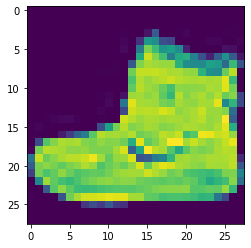

In [6]:
plt.imshow(single_image)

In [7]:
single_image=single_image/255

In [8]:
#convert into to categorical
from tensorflow.keras.utils import to_categorical
y_example=to_categorical(y_train)

In [9]:
y_example.shape

(60000, 10)

In [10]:
y_cat_test =to_categorical(y_test)
y_cat_train =to_categorical(y_train)

In [11]:
X_train=X_train/255
X_test=X_test/255

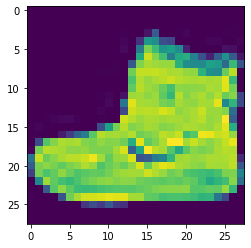

In [13]:
scaled_image=X_train[0]
plt.imshow(scaled_image)


In [16]:
#batch_size,width,heigth,colur_channels
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

model =Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#output layer -softmax-->multiclass classifcation
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop =EarlyStopping(monitor="val_loss",patience=2)

In [20]:
model.fit(X_train,
          y_cat_train,
          epochs=20,
          validation_data=(X_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4141 - accuracy: 0.8522 - val_loss: 0.3275 - val_accuracy: 0.8805
Epoch 2/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2857 - accuracy: 0.8954 - val_loss: 0.2950 - val_accuracy: 0.8917
Epoch 3/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2407 - accuracy: 0.9113 - val_loss: 0.2836 - val_accuracy: 0.8978
Epoch 4/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2067 - accuracy: 0.9227 - val_loss: 0.2733 - val_accuracy: 0.9039
Epoch 5/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1782 - accuracy: 0.9338 - val_loss: 0.2603 - val_accuracy: 0.9065
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1544 - accuracy: 0.9425 - val_loss: 0.2663 - val_accuracy: 0.9098
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1336 - accuracy: 0.9504 - val_loss: 0.2794 -

In [21]:
metrics =pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.414119,0.852200,0.327469,0.8805
1,0.285655,0.895450,0.295026,0.8917
2,0.240712,0.911300,0.283556,0.8978
3,0.206749,0.922683,0.273344,0.9039
4,0.178156,0.933850,0.260327,0.9065
5,0.154366,0.942500,0.266273,0.9098
6,0.133561,0.950367,0.279441,0.9058


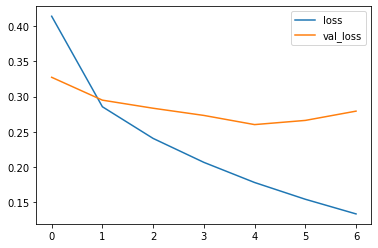

In [22]:
metrics[["loss","val_loss"]].plot()

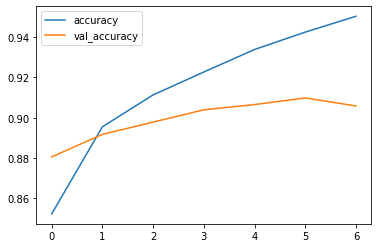

In [23]:
metrics[["accuracy","val_accuracy"]].plot()


In [24]:
model.evaluate(X_test,y_cat_test)


313/313 [==============================] - 1s 5ms/step - loss: 0.2794 - accuracy: 0.9058


[0.27944105863571167, 0.9057999849319458]

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions =model.predict(X_test)

In [26]:
import tensorflow as tf
predictions=tf.round(predictions)
predictions[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)>

In [27]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       0.99      0.98      0.99      1000
           2       0.93      0.76      0.83      1000
           3       0.93      0.92      0.92      1000
           4       0.82      0.90      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.77      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.94      0.96      1000

   micro avg       0.91      0.90      0.91     10000
   macro avg       0.92      0.90      0.91     10000
weighted avg       0.92      0.90      0.91     10000
 samples avg       0.90      0.90      0.90     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
import numpy as np
rounded_labels=np.argmax(predictions, axis=1)
rounded_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

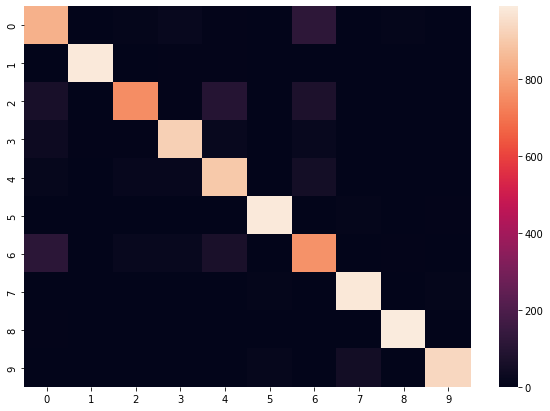

In [29]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,rounded_labels))

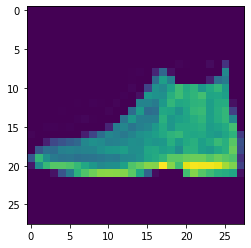

In [30]:
my_image=X_test[0]
plt.imshow(my_image.reshape(28,28))

In [31]:
predcit=model.predict(my_image.reshape(1,28,28,1))

#Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [33]:
predict=tf.round(predcit)
import numpy as np
rounded_labels=np.argmax(predict, axis=1)
rounded_labels

array([9])